In [1]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import example
reload(example)                                                                                                        
import torch                                                                                                            
import torchvision                                                                                                      
import torchvision.utils as vutils                                                                                      
import torchvision.transforms as transforms                                                                             
from torch.autograd import Variable                                                                                     
import torch.nn as nn                                                                                                   
import torch.nn.functional as F                                                                                         
import torch.optim as optim                                                                                             
import torch.backends.cudnn as cudnn                                                                                    
from models.vgg import VGG                                                                                              
from models.lenet import LeNet                                                                                          
import models.resnet as resnet                                                                                          
import models.densenet as densenet                                                                                      
import models.alexnet as alexnet                                                                                        
import models.googlenet as googlenet                                                                                    
import attacks                                                                                                          
import numpy as np                                                                                                      
import argparse                                                                                                         
from collections import OrderedDict                                                                                     

In [2]:
unperturbed = np.load("/home/romina/APE-GAN/resAPE-GAN.npy")
perturbed = np.load("/home/romina/APE-GAN/adv.npy")
orig = np.load("/home/romina/APE-GAN/gtData.npy")
np_labels = np.load("labels.npy")

In [47]:
unperturbed.shape

(10000, 32, 32, 3)

In [3]:
ape_carlini = np.load("/home/romina/APE-GAN/resAPE-GAN_originalcarlini.npy")
carlini = np.load("/home/romina/atgan/attacks/cw_adv.npy")

In [6]:
carlini.shape

(1024, 32, 32, 3)

In [7]:
ape_carlini.shape

(1024, 32, 32, 3)

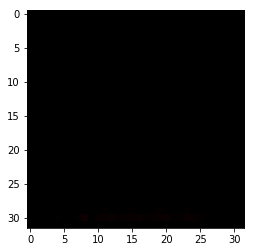

In [12]:
plt.imshow(ape_carlini[4].clip(0,1))

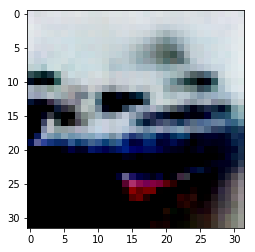

In [4]:
plt.imshow(unperturbed[1].clip(0,1))

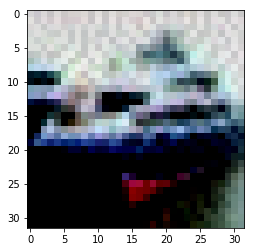

In [6]:
plt.imshow(perturbed[1].clip(0,1))

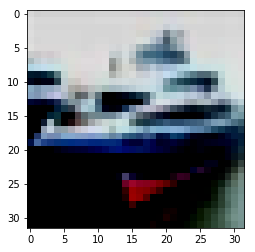

In [7]:
plt.imshow(orig[1].clip(0,1))

In [6]:
c.shape

(128, 32, 32, 3)

In [13]:
architectures = {                                                                                                   
'VGG16': ['1_GPU_saved_models/VGG16.pth','1_GPU_saved_models/VGG16_attacker_0.005.pth'],                            
#'res16': ['1_GPU_saved_models/res18_nodrop_joey.pth','saved/res16_attacker_0.005.pth'],                            
'res18':                                                                                                            
['1_GPU_saved_models/res18_nodrop_joey.pth','1_GPU_saved_models/res18_nodrop_joey_attacker_0.005.pth'],             
'dense121':                                                                                                         
['1_GPU_saved_models/dense121_nodrop_joey.pth','1_GPU_saved_models/dense121_nodrop_joey_attacker_0.005.pth'],       
'alex':                                                                                                             
['1_GPU_saved_models/alex_nodrop_joey.pth','1_GPU_saved_models/alex_nodrop_joey_attacker_0.005.pth'],               
'googlenet':                                                                                                        
['1_GPU_saved_models/googlenet_nodrop_joey.pth','1_GPU_saved_models/googlenet_nodrop_joey_attacker_0.005.pth'],     
'lenet':                                                                                                            
['1_GPU_saved_models/lenet_nodrop_joey.pth','1_GPU_saved_models/lenet_nodrop_joey_attacker_0.005.pth']}

In [14]:
names = {
    'VGG16': VGG,
    'res18': resnet.ResNet18,
    'dense121': densenet.densenet_cifar,
    'alex': alexnet.AlexNet,
    'googlenet': googlenet.GoogLeNet,
    'lenet': LeNet
}

In [15]:
classifier_name = 'VGG16'
path_to_classifier_weights = architectures[classifier_name][0]
criterion = nn.CrossEntropyLoss()
#_, testloader = example.load_cifar()
modelVGG = example.prep(names[classifier_name]())
modelVGG.load_state_dict(torch.load(path_to_classifier_weights))

In [80]:
classifier_name = 'res18'
path_to_classifier_weights = architectures[classifier_name][0]
#criterion = nn.CrossEntropyLoss()
#_, testloader = example.load_cifar()
modelRES = example.prep(names[classifier_name]())
modelRES.load_state_dict(torch.load(path_to_classifier_weights))

In [82]:
classifier_name = 'dense121'
path_to_classifier_weights = architectures[classifier_name][0]
#criterion = nn.CrossEntropyLoss()
#_, testloader = example.load_cifar()
modelDENSE = example.prep(names[classifier_name]())
modelDENSE.load_state_dict(torch.load(path_to_classifier_weights))

In [83]:
classifier_name = 'alex'
path_to_classifier_weights = architectures[classifier_name][0]
#criterion = nn.CrossEntropyLoss()
#_, testloader = example.load_cifar()
modelALEX = example.prep(names[classifier_name]())
modelALEX.load_state_dict(torch.load(path_to_classifier_weights))

In [5]:
classifier_name = 'googlenet'
path_to_classifier_weights = architectures[classifier_name][0]
#criterion = nn.CrossEntropyLoss()
#_, testloader = example.load_cifar()
modelGOOGLE = example.prep(names[classifier_name]())
modelGOOGLE.load_state_dict(torch.load(path_to_classifier_weights))

In [85]:
classifier_name = 'lenet'
path_to_classifier_weights = architectures[classifier_name][0]
#criterion = nn.CrossEntropyLoss()
#_, testloader = example.load_cifar()
modelLENET = example.prep(names[classifier_name]())
modelLENET.load_state_dict(torch.load(path_to_classifier_weights))

In [27]:
unperturbed_1 = torch.from_numpy(unperturbed.transpose(0,3,1,2))
unperturbed_2 = unperturbed_1.type(torch.FloatTensor)
y_hat = model(Variable(unpert_2))
predicted = torch.max(y_hat.data, 1)[1]

In [28]:
predicted[4]

4

In [29]:
b_1 = torch.from_numpy(b.transpose(0,3,1,2))
b_2 = b_1.type(torch.FloatTensor)
y_hat = model(Variable(b_2))
predicted = torch.max(y_hat.data, 1)[1]
predicted[4]

1

In [30]:
c_1 = torch.from_numpy(c.transpose(0,3,1,2))
c_2 = c_1.type(torch.FloatTensor)
y_hat = model(Variable(c_2))
predicted = torch.max(y_hat.data, 1)[1]

In [49]:
classifier_name = 'VGG16'
path_to_classifier_weights = architectures[classifier_name][0]
criterion = nn.CrossEntropyLoss()
#_, testloader = example.load_cifar()
model = example.prep(VGG())
model.load_state_dict(torch.load(path_to_classifier_weights))

In [49]:
defensed = torch.from_numpy(unperturbed.transpose(0,3,1,2))
defensed = defensed.type(torch.FloatTensor)
attacked = torch.from_numpy(perturbed.transpose(0,3,1,2))
attacked = attacked.type(torch.FloatTensor)
original = torch.from_numpy(orig.transpose(0,3,1,2))
original = original.type(torch.FloatTensor)
labels = torch.from_numpy(np_labels)
labels = labels.type(torch.cuda.LongTensor)

In [16]:
defensed = torch.from_numpy(ape_carlini.transpose(0,3,1,2))
defensed = defensed.type(torch.FloatTensor)
attacked = torch.from_numpy(carlini.transpose(0,3,1,2))
attacked = attacked.type(torch.FloatTensor)
original = torch.from_numpy(orig.transpose(0,3,1,2))
original = original.type(torch.FloatTensor)
labels = torch.from_numpy(np_labels)
labels = labels.type(torch.cuda.LongTensor)

In [26]:
def test(model, defensed, attacked, original, labels):
    correct, correct_adv, correct_unperturbed, total = 0.0, 0.0, 0.0, 0.0
    
    total = 1024
    piece_size = 128
    nums = (total / piece_size)
    print nums
    
    for i in range(nums):
        #get accuracies on model from on all three datasets
        #1 original
        y_hat = model(Variable(original[i*piece_size:i*piece_size+piece_size,:,:,:]))
        predicted = torch.max(y_hat.data, 1)[1]
        correct += predicted.eq(labels[i*piece_size:i*piece_size+piece_size]).sum()

        #attacked
        y_hat_2 = model(Variable(attacked[i*piece_size:i*piece_size+piece_size,:,:,:]))
        predicted_2 = torch.max(y_hat_2.data,1)[1]
        correct_adv += predicted_2.eq(labels[i*piece_size:i*piece_size+piece_size]).sum()

        #defensed
        y_hat_3 = model(Variable(defensed[i*piece_size:i*piece_size+piece_size,:,:,:]))
        predicted_3 = torch.max(y_hat_3.data,1)[1]
        correct_unperturbed += predicted_3.eq(labels[i*piece_size:i*piece_size+piece_size]).sum()
        #print i
    
    return (correct/total)*100.0, (correct_adv/total)*100.0, (correct_unperturbed/total)*100.0
    

In [99]:
test(modelVGG, defensed,attacked,original,labels)

(87.44, 15.379999999999999, 67.34)

In [87]:
test(modelRES, defensed,attacked,original,labels)

(88.94999999999999, 46.27, 72.64)

In [88]:
test(modelDENSE, defensed,attacked,original,labels)

(80.87, 34.03, 64.86)

In [89]:
test(modelLENET, defensed,attacked,original,labels)

(68.55, 51.470000000000006, 57.440000000000005)

In [8]:
test(modelGOOGLE, defensed,attacked,original,labels)

200


(86.83, 36.74, 67.22)

In [92]:
test(modelALEX, defensed,attacked,original,labels)

(73.32, 70.56, 67.44)

Original carlini_wagner result

In [27]:
test(modelVGG, defensed,attacked,original,labels)

8


(86.71875, 11.9140625, 12.98828125)

In [59]:
_, testloader = example.load_cifar()
model=modelVGG
adv = np.zeros((10000,3,32,32))
num_batches = 0
use_cuda = True
attacker = attacks.CarliniWagner(verbose=False)
correct_adv = 0.0

for data in testloader:
    inputs, labels = data
    inputs = Variable((inputs.cuda() if use_cuda else inputs), requires_grad=True)
    labels = Variable((labels.cuda() if use_cuda else labels), requires_grad=False)

    y_hat = model(inputs)
    loss = criterion(y_hat, labels)
    loss.backward()

    #predicted = torch.max(y_hat.data, 1)[1]
    #correct += predicted.eq(labels.data).sum() 

    adv_inputs, adv_labels, num_unperturbed = attacker.attack(inputs, labels, model)
    for i in range(len(adv_inputs)):
        adv[num_batches:num_batches+1] = adv_inputs[i].data.cpu().numpy()
        num_batches += 1
    #adv[num_batches:num_batches + 128] = adv_inputs[:].data.cpu().numpy()
    #num_batches += 128
    correct_adv += num_unperturbed
    print correct_adv

    #total += labels.size(0)
np.save("adv_cw.npy",adv) 


==> Preparing data..
Files already downloaded and verified
Files already downloaded and verified
10000
0.0
0.0
0.0
0.0
0.0


Process Process-104:
Process Process-99:
Process Process-98:
Process Process-103:
Process Process-101:
Process Process-102:
Process Process-97:
Process Process-100:
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
  File "/home/romina/anaconda3/envs/py27/lib/python2.7/multiprocessing/process.py", line 267, in _bootstrap
Traceback (most recent call last):
  File "/home/romina/anaconda3/envs/py27/lib/python2.7/multiprocessing/process.py", line 267, in _bootstrap
  File "/home/romina/anaconda3/envs/py27/lib/python2.7/multiprocessing/process.py", line 267, in _bootstrap
  File "/home/romina/anaconda3/envs/py27/lib/python2.7/multiprocessing/process.py", line 267, in _bootstrap
  File "/home/romina/anaconda3/envs/py27/lib/python2.7/multiprocessing/process.py", line 267, in _bootstrap
    self.run()


KeyboardInterrupt: 

KeyboardInterrupt
  File "/home/romina/anaconda3/envs/py27/lib/python2.7/site-packages/torch/multiprocessing/queue.py", line 21, in recv
    buf = self.recv_bytes()
KeyboardInterrupt


In [24]:
%ls


1_GPU_saved_models/    att_plots/                labels.npy      setup*
adv_cw.npy             data/                     models/         setup_gpu
adv_fgsm.npy           DCGAN_attack_results.csv  plot.py         test_all.py
adv.npy                example.py                Preparing       visualize.py
ape-gan-defense.ipynb  example.pyc               resAPE-GAN.npy
attacks.py             gtData.npy                saved/
attacks.pyc            images/                   saved2/


In [38]:
fgsm_perturbed = np.load("adv_fgsm.npy").transpose(0,2,3,1)
#fgsm_perturbed = fgsm_perturbed.type(torch.FloatTensor)


In [39]:
np.save("adv_fgsm_t.npy",fgsm_perturbed)

In [40]:
cw_perturbed = np.load("adv_cw.npy").transpose(0,2,3,1)
#cw_perturbed = cw_perturbed.type(torch.FloatTensor)
np.save("adv_cw_t.npy",cw_perturbed)

In [41]:
%cp adv_cw_t.npy ~/APE-GAN/
%cp adv_fgsm_t.npy ~/APE-GAN/

Ran ape_gan

In [42]:
%cp /home/romina/APE-GAN/res_ape_fgsm.npy .
%cp /home/romina/APE-GAN/res_ape_cw.npy .

In [43]:
%ls

1_GPU_saved_models/    attacks.pyc               labels.npy        saved2/
adv_cw.npy             att_plots/                models/           setup*
adv_cw_t.npy           data/                     plot.py           setup_gpu
adv_fgsm.npy           DCGAN_attack_results.csv  Preparing         test_all.py
adv_fgsm_t.npy         example.py                res_ape_cw.npy    visualize.py
adv.npy                example.pyc               res_ape_fgsm.npy
ape-gan-defense.ipynb  gtData.npy                resAPE-GAN.npy
attacks.py             images/                   saved/


In [52]:
fgsm_attacked = torch.from_numpy(np.load("adv_fgsm.npy"))
fgsm_attacked = fgsm_attacked.type(torch.FloatTensor)
fgsm_unperturbed = torch.from_numpy(np.load("res_ape_fgsm.npy").transpose(0,3,1,2))
fgsm_unperturbed = fgsm_unperturbed.type(torch.FloatTensor)

In [58]:
test(modelVGG, fgsm_unperturbed,fgsm_attacked,original,labels)

100


(87.44, 27.060000000000002, 40.48)

In [54]:
cw_attacked = torch.from_numpy(np.load("adv_cw.npy"))
cw_attacked = cw_attacked.type(torch.FloatTensor)
cw_unperturbed = torch.from_numpy(np.load("res_ape_cw.npy").transpose(0,3,1,2))
cw_unperturbed = cw_unperturbed.type(torch.FloatTensor)

In [57]:
test(modelVGG, cw_unperturbed,cw_attacked,original,labels)

100


(87.44, 58.540000000000006, 78.24)